#Netflix Dataset:

#This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

#In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

#Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

#Attribute Information
* show_id : Unique ID for every Movie / Tv Show

* type : Identifier - A Movie or TV Show

* title : Title of the Movie / Tv Show

* director : Director of the Movie

* cast : Actors involved in the movie / show

* country : Country where the movie / show was produced

* date_added : Date it was added on Netflix

* release_year : Actual Releaseyear of the movie / show

* rating : TV Rating of the movie / show

* duration : Total Duration - in minutes or number of seasons

* listed_in : Genere

* description: The Summary description

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Datasets/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

#A look at the dataset

In [ ]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2245,s2246,Movie,Forks Over Knives,Lee Fulkerson,NaN,United States,"October 3, 2019",2011,PG,96 min,Documentaries,According to the research of two food scientis...
6889,s6890,Movie,The Space Between Us,Peter Chelsom,"Gary Oldman, Asa Butterfield, Carla Gugino, Br...",United States,"June 1, 2019",2016,PG-13,120 min,"Action & Adventure, Romantic Movies, Sci-Fi & ...","After years of limited contact with Earth, an ..."
1300,s1301,TV Show,Cheers,NaN,"Ted Danson, Rhea Perlman, George Wendt, John R...",United States,"July 1, 2017",1992,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies","Sam Malone, an ex-baseball player turned bar o..."
3702,s3703,TV Show,Locust,NaN,"Pyotr Fyodorov, Paulina Andreeva, Dmitry Shevc...",Russia,"August 1, 2017",2014,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Romant...",A torrid affair between a passionate lowborn p...
229,s230,Movie,A Single Man,Tom Ford,"Colin Firth, Julianne Moore, Nicholas Hoult, G...",United States,"November 11, 2019",2009,R,100 min,"Dramas, Independent Movies, LGBTQ Movies",This stream-of-consciousness drama centers on ...


In [28]:
df.shape

(7787, 12)

This dataset has 7797 observations and 12 features.

#Checking for Null Values

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

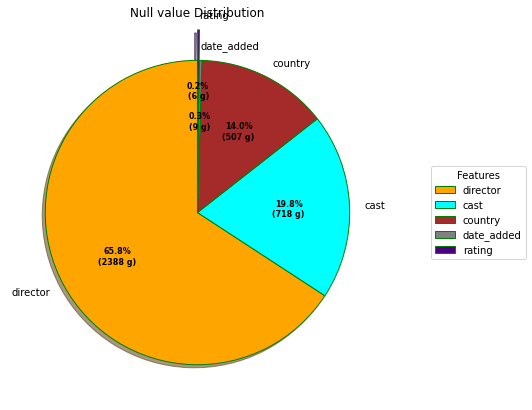

In [ ]:
cars = ['director', 'cast', 'country',
        'date_added', 'rating']  
data = [2389, 718, 507, 10, 7]
explode = (0.0, 0.0, 0.0, 0.0, 0.2)
colors = ( "orange", "cyan", "brown",
          "grey", "indigo")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, cars,
          title ="Features",
          loc ="center left",
          bbox_to_anchor =(1.1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Null value Distribution")
  
# show plot
plt.show()

* <b> 2389 nulls in 'director' - 65.8% Nulls</b>
* <b> 718 in 'cast' - 19.8% Nulls</b>
* <b> 507 in 'country' - 14% Nulls</b>
* <b> 10 in 'date_added' - 0.3% Nulls</b>
* <b> 7 in 'rating' - 0.2% Nulls</b>

In [29]:
df.size

93444

#3.88% null values in the dataset

In [34]:
percent_nulls = (pd.DataFrame(df.isnull().sum(), columns=["count"])["count"].sum())/df.size

In [36]:
percent_nulls*100

3.885749753863276

#Checking for duplicates

In [37]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


No duplicates were found.

#EDA

#<b>Countries that produce highest amount of content, in descending order:</b>

In [38]:
def convert_to_list(df):
  country_wise = {}
  country_list_final = []
  country_list = list(df['country'])
  for each in range(len(country_list)):
    country_list_final.extend(country_list[each].split(", "))
  for each in country_list_final:
    if each not in country_wise:
      country_wise[each] = country_list_final.count(each)
  return country_wise

Converting null values in country feature to "Not Available":

In [39]:
df['country'].fillna("Not Available", inplace=True)
country_dict = convert_to_list(df)
country_df = pd.DataFrame.from_dict(country_dict, orient='index', columns=['Movies/TV Series'])
country_df.drop("Not Available").sort_values('Movies/TV Series', ascending=False)

,Movies/TV Series
United States,3296
India,990
United Kingdom,722
Canada,412
France,349
...,...
Dominican Republic,1
Samoa,1
Azerbaijan,1
Bermuda,1


Text(0, 0.5, 'Total Movies/TV Series made')

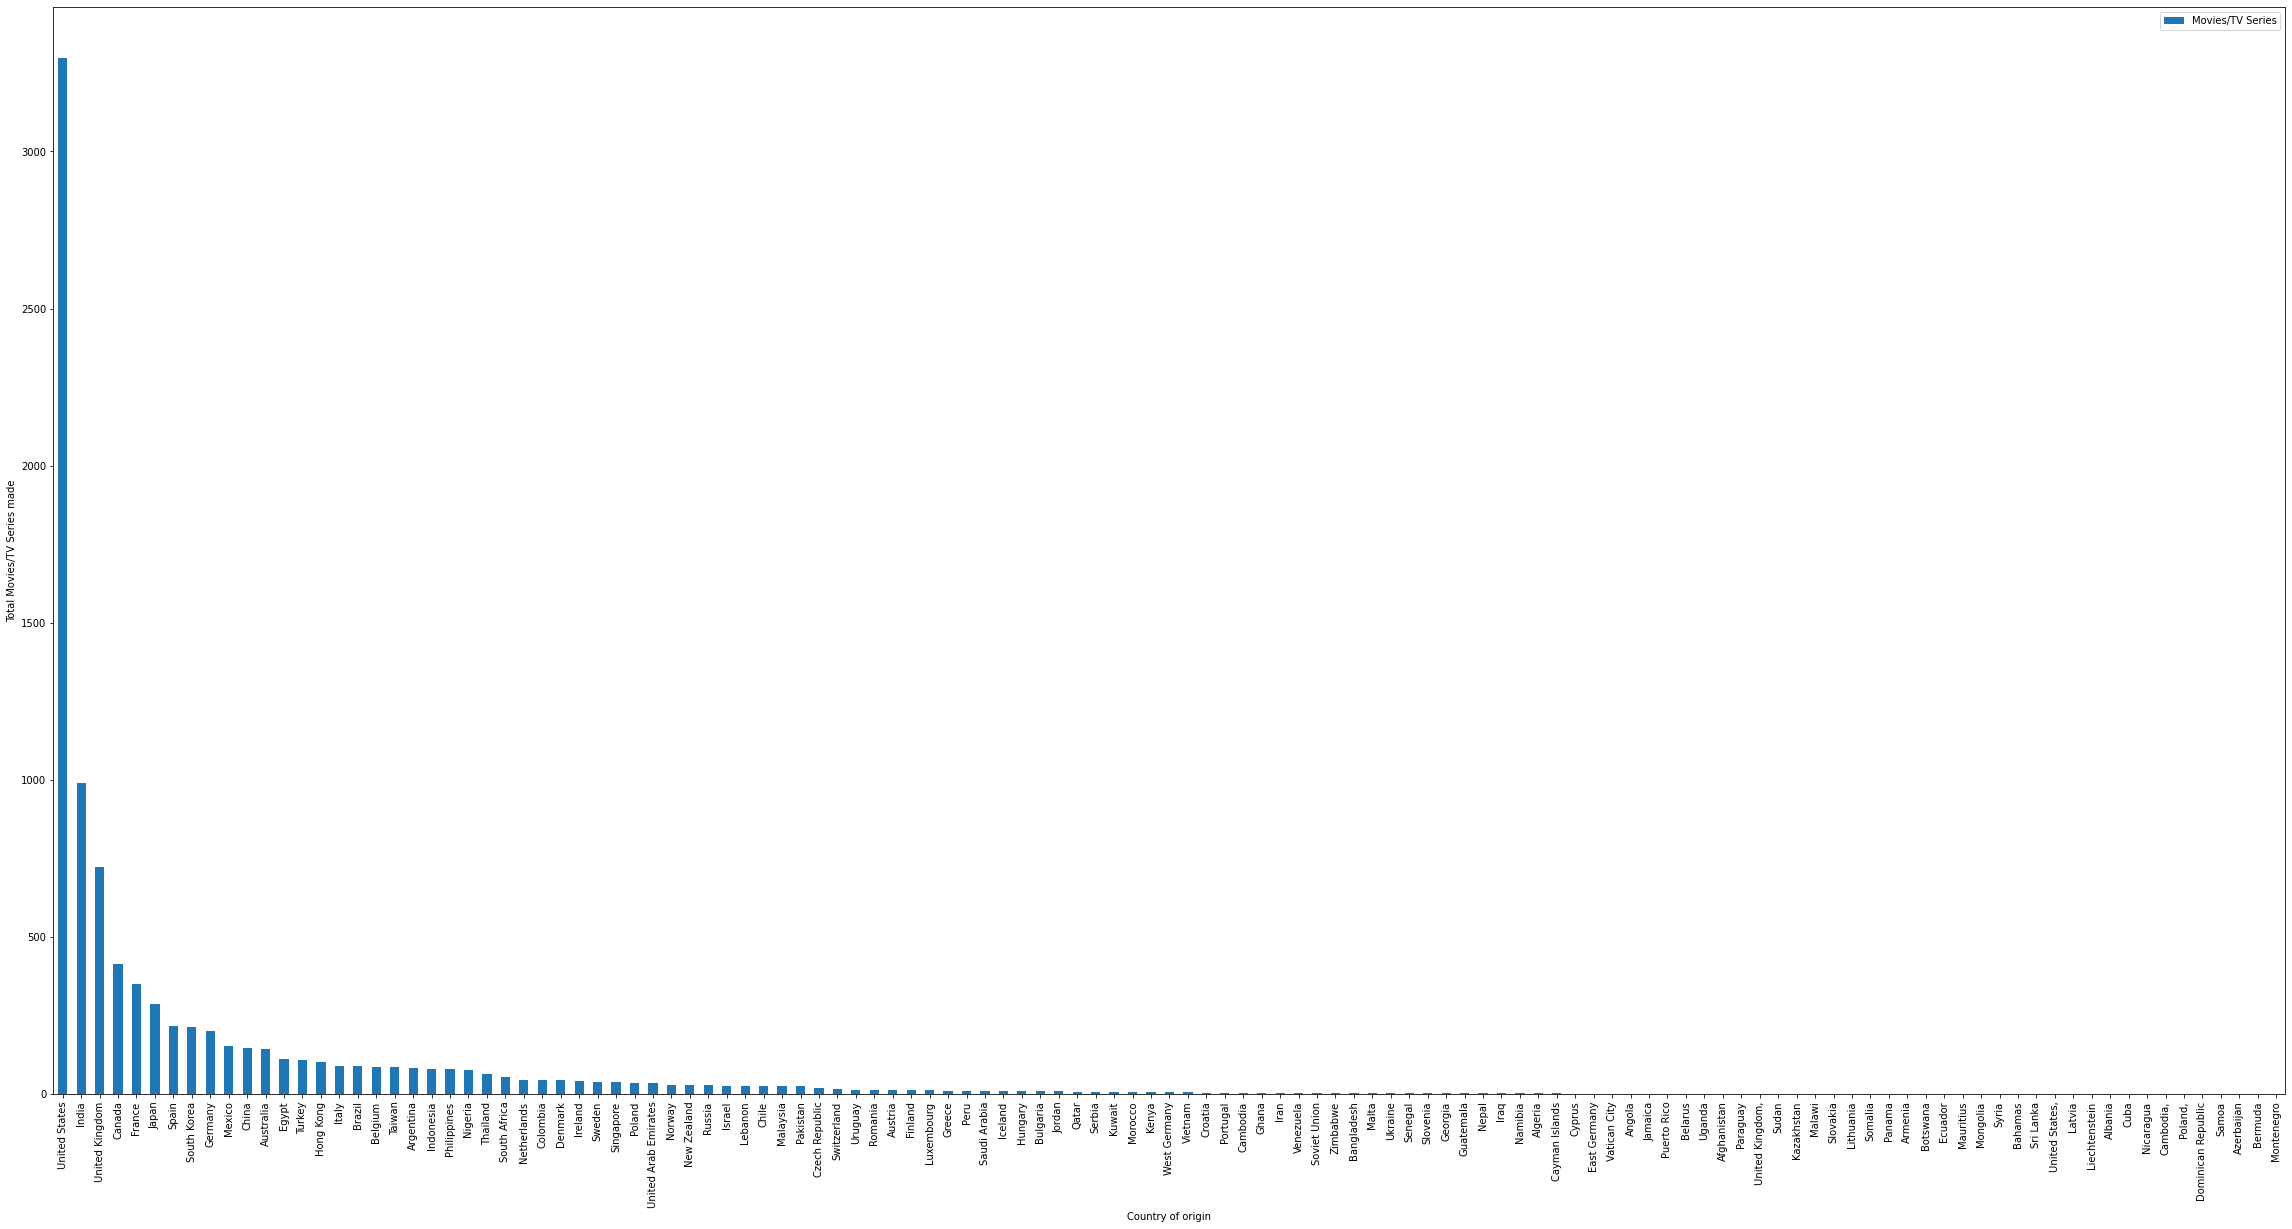

In [40]:
country_df.drop("Not Available").sort_values('Movies/TV Series', ascending=False).plot(kind='bar', figsize=(40,20))
plt.xlabel("Country of origin")
plt.ylabel("Total Movies/TV Series made")

#Top 10 countries:
* United States
* India
* United Kingdom
* Canada
* France
* Japan
* Spain
* South Korea
* Germany
* Mexico

# <b>Movies/TV Shows according to "rating"</b>

In [41]:
def get_rating_plot(df):
  df_ = df['rating'].dropna()
  rating_feature = list(df_.unique())
  ratings_dict = {}
  for each in list(df_):
    if each not in ratings_dict:
      ratings_dict[each] = list(df_).count(each)
  ratings_df = pd.DataFrame.from_dict(ratings_dict, orient='index', columns=['total_count']).sort_values('total_count', ascending=False)
  plt.rcParams["figure.figsize"] = (15, 10)
  ratings_df.plot(kind='bar', color='pink')
  plt.xlabel("Rating Type")
  plt.ylabel("Total Movies/TV Series")
  plt.title("rating type vs movies/tv series made")
  plt.xticks(rotation=80)


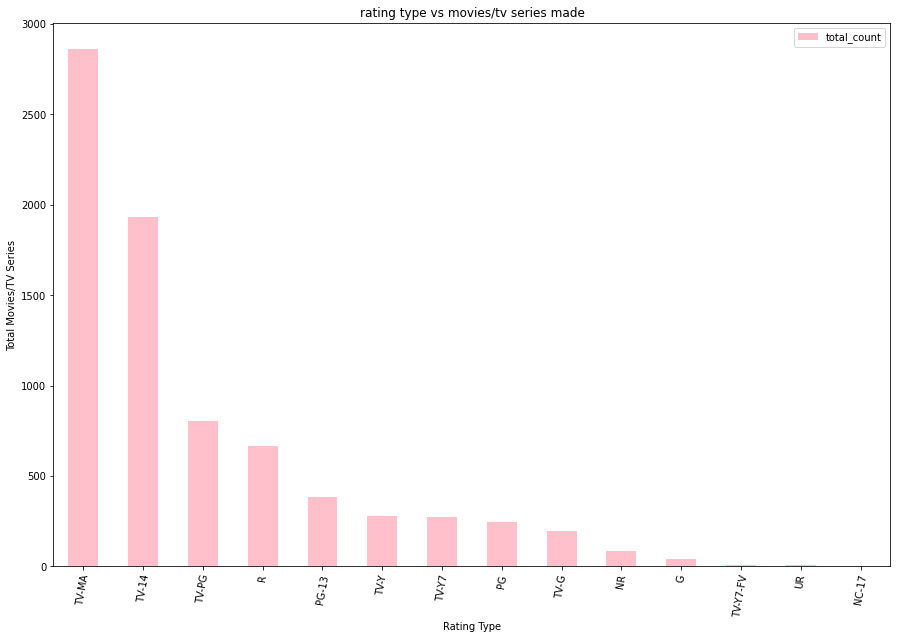

In [42]:
get_rating_plot(df)

# Most of the TV Shows and Movies are made for Mature Audience, followed by TV-14, TV-PG, R, PG-13.